# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 


## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [63]:
pre_df = pd.read_csv('../../datasets/checker_timestamp.csv')
pre_df['timestamp'] = pd.to_datetime(pre_df['timestamp'])
pre_df['date'] = pre_df['timestamp'].dt.date
pre_df['hour'] = pre_df['timestamp'].dt.hour
pre_df['day_of_week'] = pre_df['timestamp'].dt.day_of_week
pre_df['daytime'] = ['am' if hour <= 11 else 'pm' for hour in pre_df['hour']]
pre_df['target'] = ['working_day' if day < 5 else 'weekend' for day in pre_df['day_of_week']]

print(pre_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    3207 non-null   datetime64[ns]
 1   date         3207 non-null   object        
 2   hour         3207 non-null   int32         
 3   day_of_week  3207 non-null   int32         
 4   daytime      3207 non-null   object        
 5   target       3207 non-null   object        
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 125.4+ KB
None


In [64]:
am = pre_df[pre_df['daytime'] == 'am'].groupby('date')['daytime'].count().reset_index(name='am').fillna(0)
print(am.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    29 non-null     object
 1   am      29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 596.0+ bytes
None


In [65]:
pm = pre_df[pre_df['daytime'] == 'pm'].groupby('date')['daytime'].count().reset_index(name='pm')
print(pm)

          date   pm
0   2020-04-17    2
1   2020-04-18   68
2   2020-04-19   15
3   2020-04-20   23
4   2020-04-21   25
5   2020-04-22   28
6   2020-04-23   33
7   2020-04-24   14
8   2020-04-25   74
9   2020-04-26  233
10  2020-04-27    2
11  2020-04-28    1
12  2020-04-29   17
13  2020-04-30   40
14  2020-05-01   52
15  2020-05-02  151
16  2020-05-03  133
17  2020-05-04   26
18  2020-05-05   58
19  2020-05-07   38
20  2020-05-08   84
21  2020-05-09   86
22  2020-05-10  133
23  2020-05-11  183
24  2020-05-12  267
25  2020-05-13  205
26  2020-05-14  509
27  2020-05-16    4
28  2020-05-17   46
29  2020-05-18    3
30  2020-05-19   14
31  2020-05-20   21
32  2020-05-21   48


In [66]:
df = pre_df[['date','target']]
df = df.merge(am, how='left').fillna(0)
df = df.merge(pm, how='left').fillna(0)
del df['target']
df['target'] = pre_df['target']
df = df.drop_duplicates(subset=['date']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    35 non-null     object 
 1   am      35 non-null     float64
 2   pm      35 non-null     float64
 3   target  35 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features?  "no, it is not easy".

<Axes: xlabel='am', ylabel='pm'>

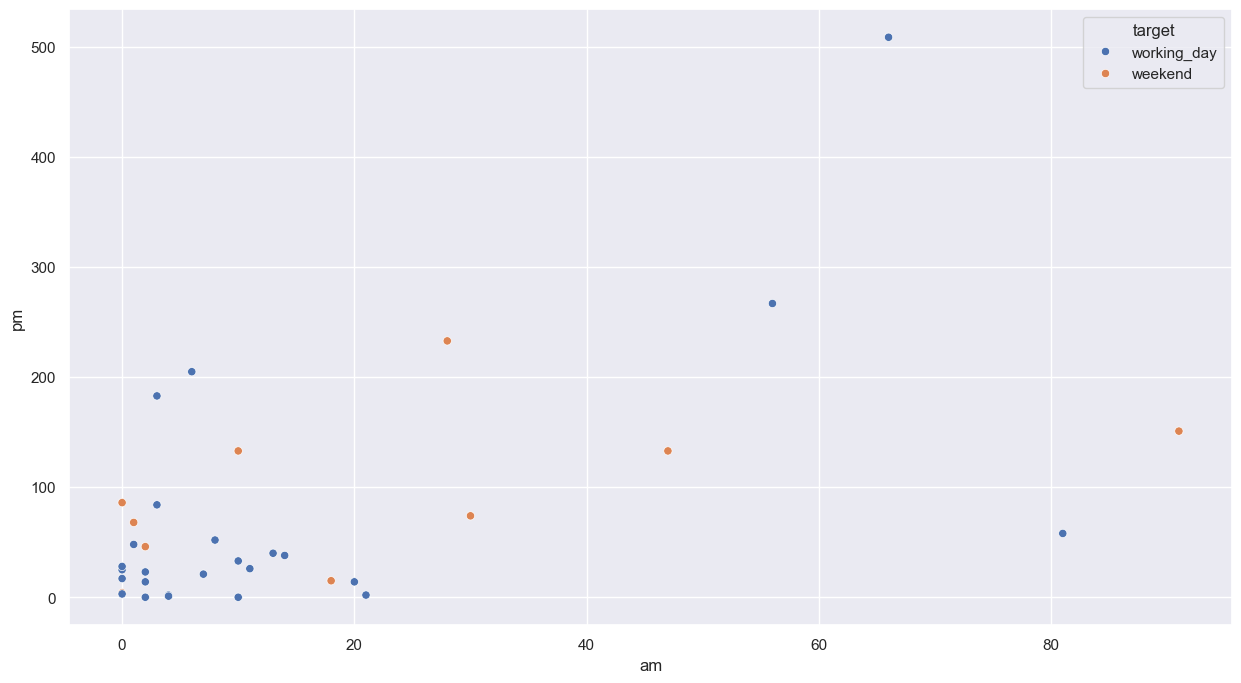

In [67]:
plt.figure(figsize=(15,8))
sns.set_theme(style='darkgrid')
sns.scatterplot(
    data=df,
    x='am',
    y='pm',
    hue='target')

"No, it is not good".

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "no, it is not good".

In [68]:
x = df[['am', 'pm']]
y = df['target']

In [69]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

In [70]:
log_reg = LogisticRegression(random_state=21, fit_intercept=False)
log_reg.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [71]:
training_prediction = log_reg.predict(x)
training_prediction

array(['weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day'], dtype=object)

In [72]:
predictions = log_reg.predict(x)
predictions

array(['weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'weekend',
       'working_day', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day', 'working_day',
       'weekend', 'working_day', 'working_day', 'working_day',
       'working_day', 'working_day', 'working_day'], dtype=object)

In [73]:
prediction_map = pd.DataFrame({
    'date': df['date'],
    'predict': predictions
})

df = df.merge(prediction_map, on='date', how='left')
df

,date,am,pm,target,predict
0,2020-04-17,21.0,2.0,working_day,weekend
1,2020-04-18,1.0,68.0,weekend,working_day
2,2020-04-19,18.0,15.0,weekend,working_day
3,2020-04-20,2.0,23.0,working_day,working_day
4,2020-04-21,0.0,25.0,working_day,working_day
5,2020-04-22,0.0,28.0,working_day,working_day
6,2020-04-23,10.0,33.0,working_day,working_day
7,2020-04-24,2.0,14.0,working_day,working_day
8,2020-04-25,30.0,74.0,weekend,working_day
9,2020-04-26,28.0,233.0,weekend,working_day


In [74]:
df = df.set_index('date')
df.to_csv('../../datasets/am_pm.csv')
df

,am,pm,target,predict
date,,,,
2020-04-17,21.0,2.0,working_day,weekend
2020-04-18,1.0,68.0,weekend,working_day
2020-04-19,18.0,15.0,weekend,working_day
2020-04-20,2.0,23.0,working_day,working_day
2020-04-21,0.0,25.0,working_day,working_day
2020-04-22,0.0,28.0,working_day,working_day
2020-04-23,10.0,33.0,working_day,working_day
2020-04-24,2.0,14.0,working_day,working_day
2020-04-25,30.0,74.0,weekend,working_day


<Axes: xlabel='am', ylabel='pm'>

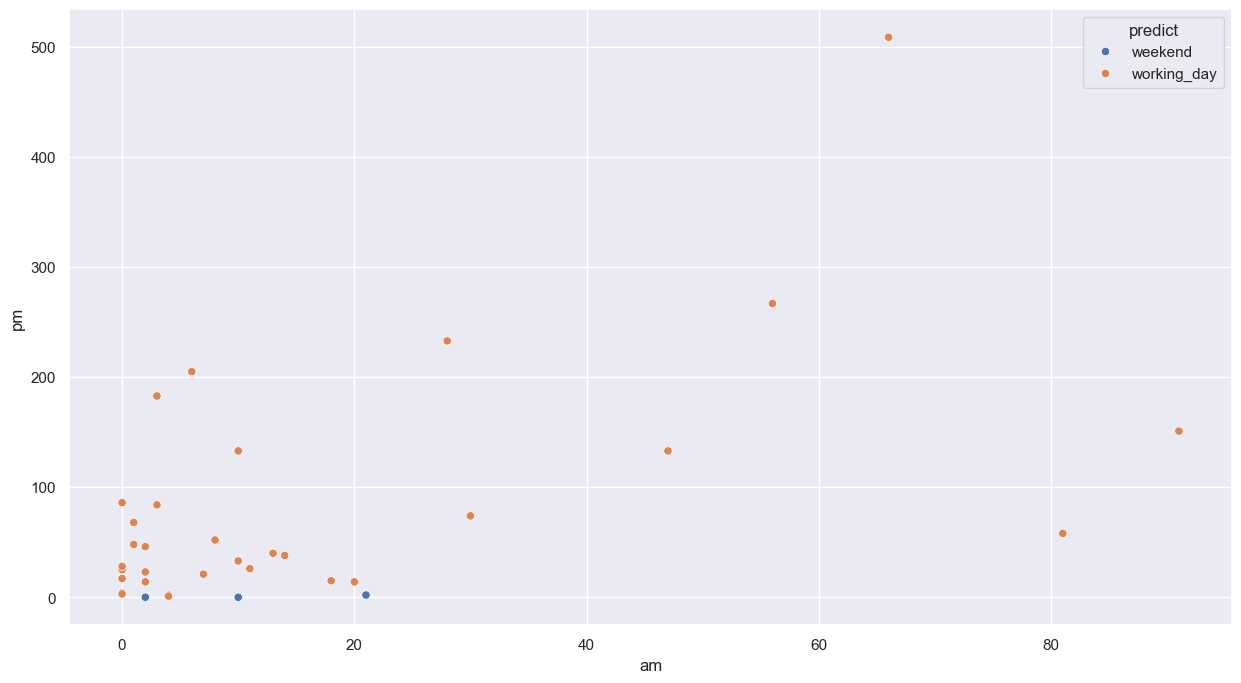

In [75]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data=df,
    x='am',
    y='pm',
    hue='predict'
)

"No, it is not good".

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "no, it is not good".

In [76]:
accuracy = accuracy_score(df['target'], df['predict'])
accuracy

0.6285714285714286

In [77]:
most_frequent_class = y.mode()[0]
naive_predictions = [most_frequent_class] * len(y)
#naive_predictions
naive_accuracy = accuracy_score(y, naive_predictions)
naive_accuracy

0.7142857142857143

"No, it is not good".